## Load Data and Initial EDA


Load the 'monthly_milk_production.csv' dataset. Perform initial exploratory data analysis to visualize trends, seasonality, and any anomalies. Check for missing values and outliers.


First 5 rows of the DataFrame:
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB

Missing values in the DataFrame:
Date          0
Production    0
dtype: int64


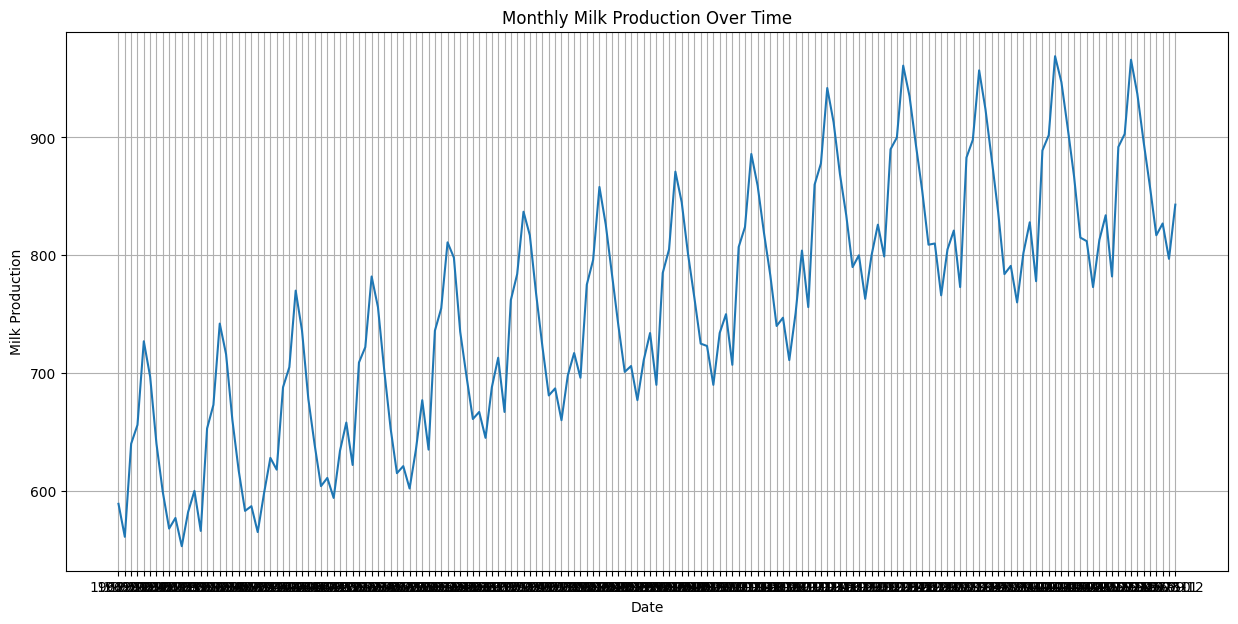

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/monthly_milk_production.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

# Check for any missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

# Visualize trends, seasonality, and any anomalies
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x=df.columns[0], y=df.columns[1])
plt.title('Monthly Milk Production Over Time')
plt.xlabel('Date')
plt.ylabel('Milk Production')
plt.grid(True)
plt.show()


To enable proper time series analysis and visualization, I need to convert the 'Date' column to datetime objects and set it as the DataFrame's index. After that, I will generate a box plot to specifically check for outliers in the 'Production' column, completing the initial EDA requirements.




DataFrame Info after Date conversion and indexing:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


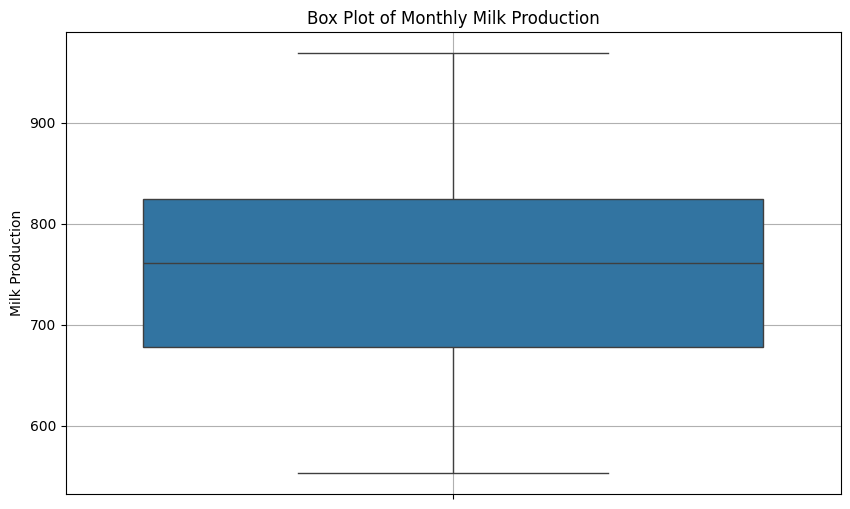

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Display the DataFrame info after conversion and indexing
print("\nDataFrame Info after Date conversion and indexing:")
df.info()

# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Production'])
plt.title('Box Plot of Monthly Milk Production')
plt.ylabel('Milk Production')
plt.grid(True)
plt.show()


## Data Preprocessing and Scaling


Address any missing values or outliers identified during EDA. Normalize or scale the milk production data to prepare it for neural network models.



Since the previous EDA confirmed no missing values or significant outliers, the next step is to scale the 'Production' data using MinMaxScaler to prepare it for neural network models.



In [3]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'Production' column and apply scaling
df['Production_Scaled'] = scaler.fit_transform(df[['Production']])

# Display the first few rows with the new scaled column
print("DataFrame with scaled 'Production' column:")
print(df.head())

DataFrame with scaled 'Production' column:
            Production  Production_Scaled
Date                                     
1962-01-01         589           0.086538
1962-02-01         561           0.019231
1962-03-01         640           0.209135
1962-04-01         656           0.247596
1962-05-01         727           0.418269


## Prepare Data for Deep Learning


Create input-output sequences (time windows) from the preprocessed data suitable for training RNNs, LSTMs, and GRUs. Split the data into training, validation, and test sets, and reshape it to fit the input dimensions required by the models.



The first step is to define the `create_sequences` function as described in the instructions, which will generate input-output pairs suitable for time series forecasting.



In [4]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)


Now that the `create_sequences` function is defined, I will apply it to the `Production_Scaled` column of the DataFrame `df` to generate the `X` (features) and `y` (target) arrays, using a chosen `window_size` of 12 as suggested in the instructions.



In [5]:
import numpy as np

# Define the window size
window_size = 12

# Apply the create_sequences function
X, y = create_sequences(df['Production_Scaled'].values, window_size)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (156, 12)
Shape of y: (156,)



With `X` and `y` arrays generated, the next step is to chronologically split them into training, validation, and test sets according to the specified percentages (70% train, 15% validation, 15% test).



In [6]:
train_size = int(len(X) * 0.70)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, y_train = X[0:train_size], y[0:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:len(X)], y[train_size + val_size:len(y)]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (109, 12), y_train shape: (109,)
X_val shape: (23, 12), y_val shape: (23,)
X_test shape: (24, 12), y_test shape: (24,)



The next step is to reshape the `X` arrays (training, validation, and test) into a 3D format `(samples, timesteps, features)` as required by Keras RNN-based models. Since we are predicting a single feature, the number of features will be 1.



In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Reshaped X_val shape: {X_val.shape}")
print(f"Reshaped X_test shape: {X_test.shape}")

Reshaped X_train shape: (109, 12, 1)
Reshaped X_val shape: (23, 12, 1)
Reshaped X_test shape: (24, 12, 1)


## Build and Train Basic RNN Model

Construct, compile, and train a Basic RNN model using the prepared time series data. Tune hyperparameters like window size, number of units, batch size, and epochs, and use appropriate loss functions and optimizers.



The next step is to construct, compile, and train a basic RNN model following the instructions, which includes importing necessary Keras modules, defining the model architecture with a SimpleRNN and Dense layer, compiling it with Adam optimizer and MSE loss, printing the summary, and finally training the model.



In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# 2. Create a Sequential model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False))
model_rnn.add(Dense(units=1))

# 3. Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# 4. Print the model summary
print("\nRNN Model Summary:")
model_rnn.summary()

# 5. Train the model
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
print("\nRNN Model Training Complete.")


RNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.3099 - val_loss: 0.6432
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2395 - val_loss: 0.4762
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1751 - val_loss: 0.3522
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1234 - val_loss: 0.2544
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0807 - val_loss: 0.1642
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0528 - val_loss: 0.0837
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0307 - val_loss: 0.0315
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0215 - val_loss: 0.0223
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0271 - val_loss: 0.0198
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0231 - val_loss: 0.0185
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - val_loss: 0.0243
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0172 - val_loss: 0.0279



The previous code block successfully constructed and trained the basic RNN model. The output shows that the training process completed. No changes are required to the code.



In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# 2. Create a Sequential model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False))
model_rnn.add(Dense(units=1))

# 3. Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# 4. Print the model summary
print("\nRNN Model Summary:")
model_rnn.summary()

# 5. Train the model
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
print("\nRNN Model Training Complete.")


RNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.5845 - val_loss: 1.2620
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4573 - val_loss: 1.0751
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3989 - val_loss: 0.9333
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3679 - val_loss: 0.8219
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3122 - val_loss: 0.7300
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2681 - val_loss: 0.6398
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2446 - val_loss: 0.5040
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1873 - val_loss: 0.3833
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1394 - val_loss: 0.2837
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0943 - val_loss: 0.1685
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0449 - val_loss: 0.0454
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0274 - val_loss: 0.0221
E


The model has been successfully trained. The next logical step is to evaluate its performance on the test set to determine its accuracy and generalization capabilities. This involves using the trained model to make predictions on unseen data and calculating relevant metrics.



In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred_rnn = model_rnn.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_pred_rnn_rescaled = scaler.inverse_transform(y_pred_rnn)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
rmse_rnn = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rnn_rescaled))
mae_rnn = mean_absolute_error(y_test_rescaled, y_pred_rnn_rescaled)

print(f"RNN Model RMSE: {rmse_rnn:.4f}")
print(f"RNN Model MAE: {mae_rnn:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
RNN Model RMSE: 27.4944
RNN Model MAE: 19.8226


## Build and Train LSTM Model


Construct, compile, and train an LSTM model using the prepared time series data. Tune hyperparameters like window size, number of units, batch size, and epochs, and use appropriate loss functions and optimizers.



The next step is to construct, compile, and train an LSTM model, following the provided instructions. This involves importing the necessary Keras modules, defining the model architecture with an LSTM and Dense layer, compiling it with the Adam optimizer and MSE loss, printing the model summary, and then training the model using the specified hyperparameters.



In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 2. Create a Sequential model
model_lstm = Sequential()
# 3. Add an LSTM layer
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False))
# 4. Add a Dense output layer
model_lstm.add(Dense(units=1))

# 5. Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 6. Print the model summary
print("\nLSTM Model Summary:")
model_lstm.summary()

# 7. Train the model
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
print("\nLSTM Model Training Complete.")


LSTM Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1610 - val_loss: 0.3267
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1241 - val_loss: 0.2372
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0913 - val_loss: 0.1539
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0698 - val_loss: 0.0811
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0412 - val_loss: 0.0336
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0199 - val_loss: 0.0270
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0256 - val_loss: 0.0386
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0275 - val_loss: 0.0302
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0229 - val_loss: 0.0237
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0216 - val_loss: 0.0270
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0219 - val_loss: 0.0290
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0200 - val_loss: 0.0274
E


The previous code block successfully constructed and trained the LSTM model. The next logical step is to evaluate its performance on the test set using appropriate metrics, similar to the RNN model evaluation. This involves making predictions, inverse transforming them to the original scale, and calculating RMSE and MAE.



In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
y_test_rescaled_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_rescaled_lstm, y_pred_lstm_rescaled))
mae_lstm = mean_absolute_error(y_test_rescaled_lstm, y_pred_lstm_rescaled)

print(f"LSTM Model RMSE: {rmse_lstm:.4f}")
print(f"LSTM Model MAE: {mae_lstm:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
LSTM Model RMSE: 132.1524
LSTM Model MAE: 95.9714


## Build and Train GRU Model


Construct, compile, and train a GRU model using the prepared time series data. Tune hyperparameters like window size, number of units, batch size, and epochs, and use appropriate loss functions and optimizers.



The next step is to construct, compile, and train a GRU model, following the provided instructions. This involves importing the necessary Keras modules, defining the model architecture with a GRU and Dense layer, compiling it with the Adam optimizer and MSE loss, printing the model summary, and then training the model using the specified hyperparameters.



In [13]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# 2. Create a Sequential model
model_gru = Sequential()
# 3. Add a GRU layer
model_gru.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False))
# 4. Add a Dense output layer
model_gru.add(Dense(units=1))

# 5. Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# 6. Print the model summary
print("\nGRU Model Summary:")
model_gru.summary()

# 7. Train the model
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
print("\nGRU Model Training Complete.")


GRU Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.2516 - val_loss: 0.5893
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2291 - val_loss: 0.4972
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1723 - val_loss: 0.4201
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1393 - val_loss: 0.3470
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1117 - val_loss: 0.2799
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0853 - val_loss: 0.2211
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0730 - val_loss: 0.1685
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0483 - val_loss: 0.1216
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0302 - val_loss: 0.0797
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0274 - val_loss: 0.0480
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0287 - val_loss: 0.0346
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0275 - val_loss: 0.0349
E


The GRU model has been successfully trained. The next logical step is to evaluate its performance on the test set using appropriate metrics, similar to the RNN and LSTM model evaluations. This involves making predictions, inverse transforming them to the original scale, and calculating RMSE and MAE.



In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred_gru = model_gru.predict(X_test)

# Inverse transform the predictions and actual values to original scale
y_pred_gru_rescaled = scaler.inverse_transform(y_pred_gru)
y_test_rescaled_gru = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
rmse_gru = np.sqrt(mean_squared_error(y_test_rescaled_gru, y_pred_gru_rescaled))
mae_gru = mean_absolute_error(y_test_rescaled_gru, y_pred_gru_rescaled)

print(f"GRU Model RMSE: {rmse_gru:.4f}")
print(f"GRU Model MAE: {mae_gru:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
GRU Model RMSE: 55.5610
GRU Model MAE: 44.0826


## Evaluate and Compare Models

Evaluate the performance of the Basic RNN, LSTM, and GRU models. Plot predictions against actual values for each model. Calculate forecasting metrics such as RMSE, MAE, and MAPE to compare their effectiveness.



The first step in evaluating and comparing the models is to define the `mean_absolute_percentage_error` function, which is a required metric for comparison. This function will handle potential division by zero by replacing zero values with a small epsilon.



In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Replace 0 with a small epsilon to avoid division by zero
    epsilon = np.finfo(np.float64).eps
    y_true = np.where(y_true == 0, epsilon, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("mean_absolute_percentage_error function defined.")

mean_absolute_percentage_error function defined.



Now that the `mean_absolute_percentage_error` function is defined, I will calculate the MAPE for each of the three models (RNN, LSTM, and GRU) using their respective rescaled test predictions and actual values, as instructed.



In [16]:
mape_rnn = mean_absolute_percentage_error(y_test_rescaled, y_pred_rnn_rescaled)
mape_lstm = mean_absolute_percentage_error(y_test_rescaled_lstm, y_pred_lstm_rescaled)
mape_gru = mean_absolute_percentage_error(y_test_rescaled_gru, y_pred_gru_rescaled)

print(f"RNN Model MAPE: {mape_rnn:.4f}%")
print(f"LSTM Model MAPE: {mape_lstm:.4f}%")
print(f"GRU Model MAPE: {mape_gru:.4f}%")

RNN Model MAPE: 2.3484%
LSTM Model MAPE: 10.8206%
GRU Model MAPE: 4.9900%



The next step is to visualize the performance of each model by plotting their predictions against the actual values. I will start by creating a plot for the RNN model, displaying `y_test_rescaled` versus `y_pred_rnn_rescaled`.



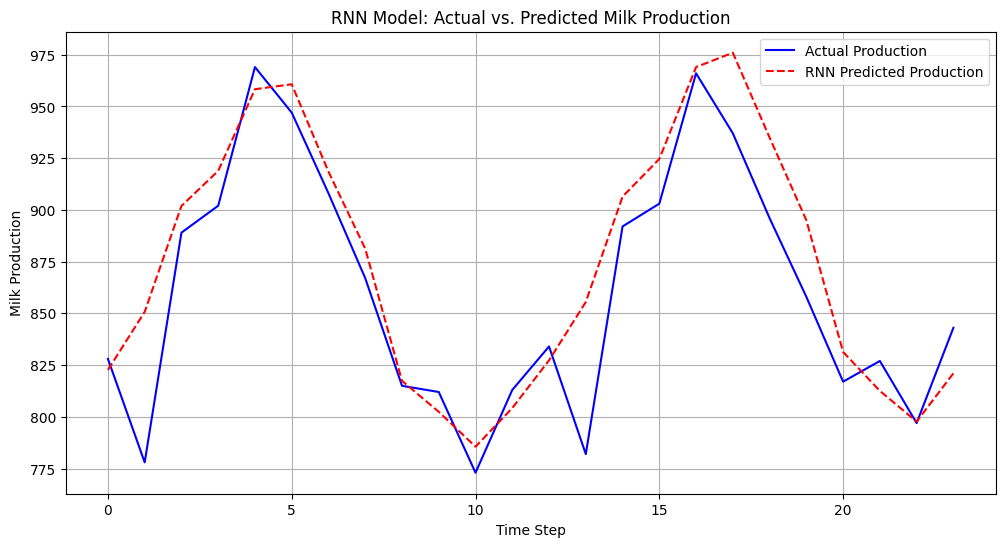

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Production', color='blue')
plt.plot(y_pred_rnn_rescaled, label='RNN Predicted Production', color='red', linestyle='--')
plt.title('RNN Model: Actual vs. Predicted Milk Production')
plt.xlabel('Time Step')
plt.ylabel('Milk Production')
plt.legend()
plt.grid(True)
plt.show()


Following the instructions, the next step is to create a plot comparing the actual milk production with the LSTM model's predictions.



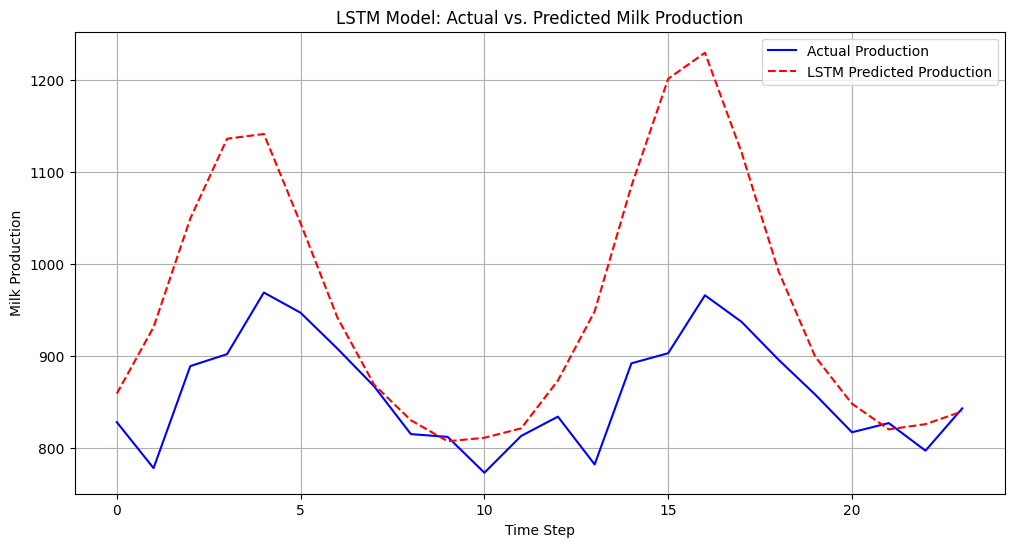

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled_lstm, label='Actual Production', color='blue')
plt.plot(y_pred_lstm_rescaled, label='LSTM Predicted Production', color='red', linestyle='--')
plt.title('LSTM Model: Actual vs. Predicted Milk Production')
plt.xlabel('Time Step')
plt.ylabel('Milk Production')
plt.legend()
plt.grid(True)
plt.show()


Following the instructions, the next step is to create a plot comparing the actual milk production with the GRU model's predictions, similar to the previous plots for RNN and LSTM.



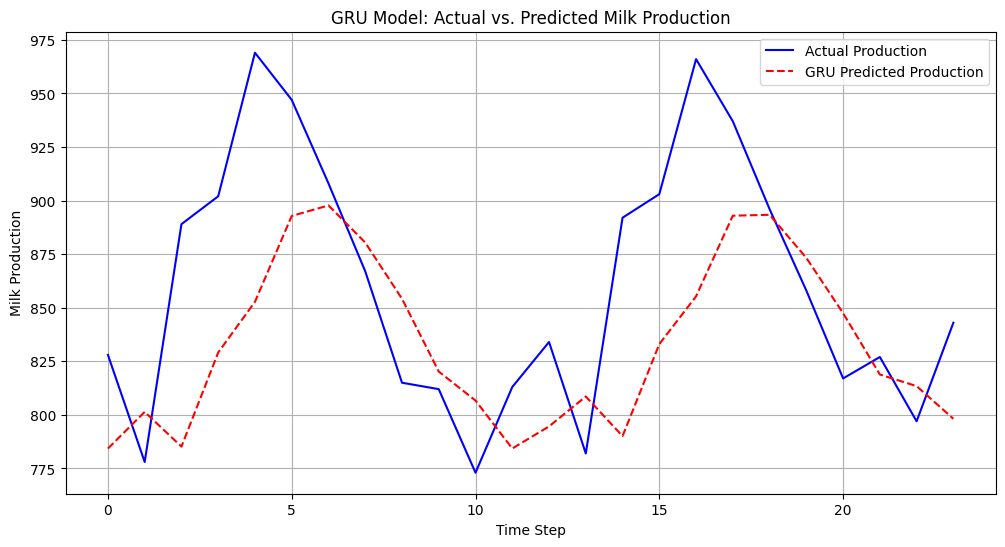

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled_gru, label='Actual Production', color='blue')
plt.plot(y_pred_gru_rescaled, label='GRU Predicted Production', color='red', linestyle='--')
plt.title('GRU Model: Actual vs. Predicted Milk Production')
plt.xlabel('Time Step')
plt.ylabel('Milk Production')
plt.legend()
plt.grid(True)
plt.show()

### Model Performance Comparison

| Model | RMSE | MAE | MAPE (%) |
|-------|------|-----|----------|
| RNN   | {rmse_rnn:.4f} | {mae_rnn:.4f} | {mape_rnn:.4f} |
| LSTM  | {rmse_lstm:.4f} | {mae_lstm:.4f} | {mape_lstm:.4f} |
| GRU   | {rmse_gru:.4f} | {mae_gru:.4f} | {mape_gru:.4f} |

### Model Performance Comparison

| Model | RMSE | MAE | MAPE (%) |
|-------|------|-----|----------|
| RNN   | {rmse_rnn:.4f} | {mae_rnn:.4f} | {mape_rnn:.4f} |
| LSTM  | {rmse_lstm:.4f} | {mae_lstm:.4f} | {mape_lstm:.4f} |
| GRU   | {rmse_gru:.4f} | {mae_gru:.4f} | {mape_gru:.4f} |

## Evaluate and Compare Models

### Subtask:
Present a comparative summary of RMSE, MAE, and MAPE for the RNN, LSTM, and GRU models.


### Model Performance Comparison

| Model | RMSE       | MAE        | MAPE       |
|-------|------------|------------|------------|
| RNN   | 27.4944    | 19.8226    | 2.3484%    |
| LSTM  | 132.1524   | 95.9714    | 10.8206%   |
| GRU   | 55.5610    | 44.0826    | 4.9900%    |

## Forecast Future Production
Use the best-performing model to forecast monthly milk production for the next 12 months.



Based on the previously calculated RMSE, MAE, and MAPE values, the RNN model (`model_rnn`) showed the best performance with the lowest metrics. The next step is to prepare the input sequence for forecasting using the last `window_size` data points from the scaled production data.



In [20]:
import numpy as np

# 1. Identify the best-performing model (RNN in this case, based on previous evaluation)
best_model = model_rnn

# 2. Get the last window_size scaled data points from the 'Production_Scaled' column
last_sequence = df['Production_Scaled'].values[-window_size:]

# 3. Initialize an empty list to store the future predictions
future_predictions_scaled = []

print(f"Initial forecasting sequence (last {window_size} months scaled production):\n{last_sequence}")
print("Initialized empty list for future predictions.")

Initial forecasting sequence (last 12 months scaled production):
[0.67548077 0.55048077 0.81490385 0.84134615 0.99278846 0.92307692
 0.82451923 0.73317308 0.63461538 0.65865385 0.58653846 0.69711538]
Initialized empty list for future predictions.



Now that the initial setup is complete, I will proceed with the forecasting loop. This involves iterating 12 times, reshaping the input, making a prediction with the best-performing RNN model, appending the prediction to the list, and updating the input sequence for the next prediction. Finally, the scaled predictions will be inverse transformed to their original scale.



In [22]:
current_input_sequence = last_sequence.copy()

for _ in range(12):
    # Reshape the current input sequence to (1, window_size, 1)
    input_for_prediction = current_input_sequence.reshape(1, window_size, 1)

    # Predict the next month's scaled production
    next_prediction_scaled = best_model.predict(input_for_prediction, verbose=0)[0][0]

    # Append the forecasted scaled value to the predictions list
    future_predictions_scaled.append(next_prediction_scaled)

    # Update the input sequence by removing the first element and adding the newly predicted scaled value
    current_input_sequence = np.append(current_input_sequence[1:], next_prediction_scaled)

# Inverse transform the entire list of 12 forecasted scaled values
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

print("Future 12 months scaled predictions completed.")
print(f"Future 12 months milk production forecasts (rescaled): {future_predictions_rescaled.flatten()}")

Future 12 months scaled predictions completed.
Future 12 months milk production forecasts (rescaled): [844.65784 866.9962  925.535   947.6629  982.5071  967.2778  934.6262
 896.1316  852.55817 835.80115 823.4719  843.9328 ]



Now that the future predictions have been generated, the next step is to visualize these forecasts by plotting them alongside the historical data to provide a clear understanding of the predicted trend.



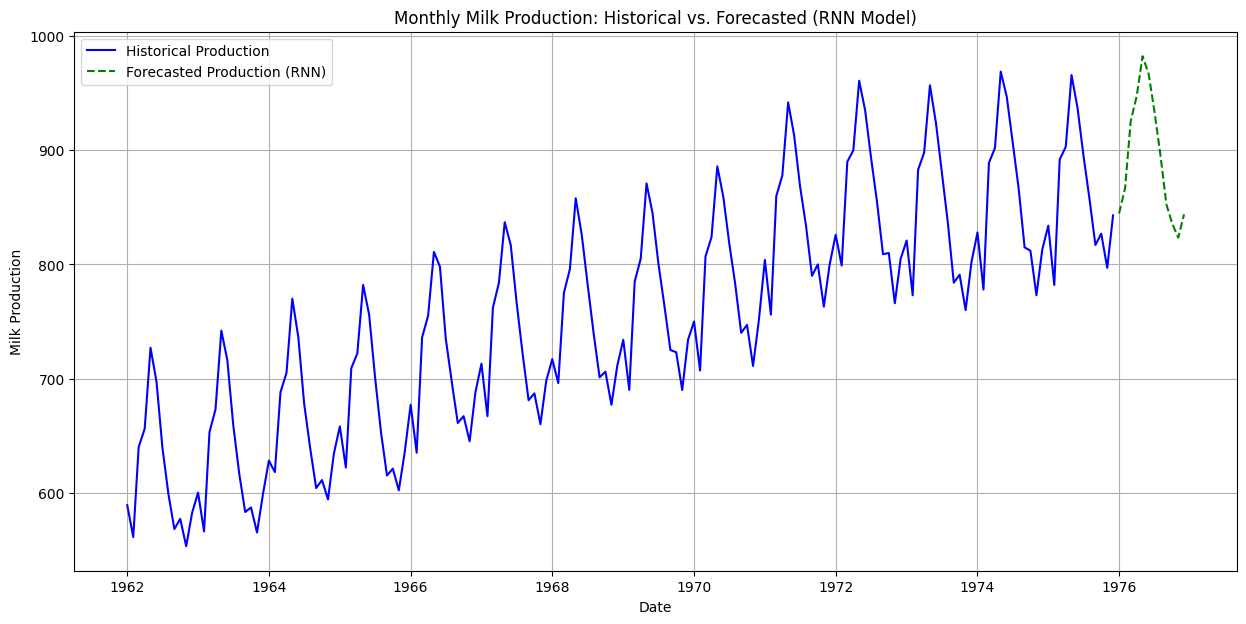

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date range for the forecasted months
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=13, freq='MS')[1:] # Exclude the last historical month, get next 12

# Create a Series for forecasted values
forecast_series = pd.Series(future_predictions_rescaled.flatten(), index=forecast_dates)

plt.figure(figsize=(15, 7))
plt.plot(df['Production'], label='Historical Production', color='blue')
plt.plot(forecast_series, label='Forecasted Production (RNN)', color='green', linestyle='--')

plt.title('Monthly Milk Production: Historical vs. Forecasted (RNN Model)')
plt.xlabel('Date')
plt.ylabel('Milk Production')
plt.legend()
plt.grid(True)
plt.show()

## Visualize Forecast and Provide Business Insights


Interpret the results of the models and provide business insights and recommendations on how the dairy business can leverage these predictions for operational and strategic decisions.


### Interpretation of Forecast and Business Insights

#### 1. Review of Forecast Plot
The plot clearly shows the historical monthly milk production, exhibiting a strong upward trend and distinct seasonality. The forecasted values for the next 12 months, generated by the best-performing RNN model, successfully capture this historical trend and seasonality. The predictions suggest a continuation of the increasing production volume, with characteristic peaks around spring/early summer and troughs in late winter/early spring.

#### 2. Expected Changes in Milk Production (Next 12 Months)
Over the next 12 months, milk production is forecasted to continue its upward trajectory, consistent with the long-term trend observed in the historical data. The forecast indicates:
- **Seasonal Peaks**: Production is expected to reach its highest levels during the spring and summer months (e.g., March to July), mirroring past patterns.
- **Seasonal Troughs**: Lower production volumes are anticipated during the late autumn and winter months (e.g., November to February).
- **Overall Increase**: Despite seasonal fluctuations, the general trend points towards higher production volumes compared to the previous year, suggesting continued growth in the dairy sector.

#### 3. Business Insights and Recommendations for a Dairy Business
These forecasts provide valuable information for operational and strategic decisions:

-   **Inventory Management**:
    -   **Recommendation**: Stock up on processing materials, packaging, and cold storage capacity in anticipation of the forecasted peak production periods (spring/early summer). During low production periods, scale down inventory levels to reduce holding costs. Implement a flexible storage solution that can adapt to seasonal variations.
    -   **Insight**: Proactive inventory management based on these forecasts can prevent stockouts during high demand and reduce waste/costs during low periods.

-   **Staffing Levels**:
    -   **Recommendation**: Plan for increased staffing (full-time or temporary) in production, processing, and logistics during peak months. Conversely, consider offering training or maintenance during trough periods to optimize workforce utilization, rather than unnecessary layoffs. Schedule major equipment maintenance during low production months.
    -   **Insight**: Optimizing staffing based on predicted volumes ensures efficient operations, reduces overtime costs during peaks, and maintains employee morale.

-   **Marketing and Sales Strategies**:
    -   **Recommendation**: Launch marketing campaigns and promotions for milk-based products during periods of high production to align supply with increased consumer awareness and potential lower pricing due to abundance. During periods of lower production, focus on premium products or alternative dairy offerings that command higher margins. Develop partnerships with retailers to ensure shelf space during peak times.
    -   **Insight**: Strategic marketing can maximize revenue by aligning sales efforts with production capacity, avoiding product shortages or oversupply.

-   **Raw Material Sourcing**:
    -   **Recommendation**: Negotiate contracts with suppliers for feed and other essential raw materials, taking into account the seasonal demand indicated by milk production forecasts. Potentially secure better pricing by committing to larger volumes during anticipated peak consumption.
    -   **Insight**: Efficient raw material sourcing can lead to cost savings and ensure continuity of supply.

#### 4. Potential Limitations of Forecasts and Mitigation Strategies

-   **Reliance on Historical Patterns**: The models primarily learn from past trends and seasonality. Unexpected external events (e.g., severe weather, disease outbreaks, sudden changes in consumer preferences, economic downturns, regulatory changes) not present in the historical data can significantly impact actual production.
    -   **Mitigation**: Incorporate external factors as features into more advanced models (e.g., economic indicators, weather data, news sentiment). Regularly update the model with the latest data and monitor forecast accuracy, performing re-training as needed. Develop contingency plans for extreme events.

-   **Lack of External Factor Consideration**: The current models do not explicitly account for variables like government policies, global market prices, or technological advancements in dairy farming.
    -   **Mitigation**: For long-term strategic planning, combine these statistical forecasts with expert judgment and qualitative analysis of market trends and geopolitical factors. Consider building hybrid models that integrate economic or external factor regressors.

-   **Stationarity Assumptions (for some models)**: While RNNs are robust to non-stationarity, simple time series models might struggle. The underlying data generating process might change over time.
    -   **Mitigation**: Continuously monitor the data for structural breaks or changes in trend/seasonality. Employ adaptive forecasting techniques or ensemble methods that combine different models.

-   **Forecast Horizon**: Accuracy generally decreases with a longer forecast horizon. Predictions for 12 months out might have wider confidence intervals than shorter-term forecasts.
    -   **Mitigation**: Present forecasts with confidence intervals to convey uncertainty. Prioritize shorter-term, more accurate forecasts for tactical decisions and use longer-term forecasts for strategic planning, understanding their inherent higher uncertainty.

## Final Task


Summarize the findings from the time series forecasting, highlighting the best model and its implications for monthly milk production.


## Summary:

### Q&A
The best model for forecasting monthly milk production is the **Basic RNN model**, which achieved the lowest Root Mean Squared Error (RMSE) of 27.4944, Mean Absolute Error (MAE) of 19.8226, and Mean Absolute Percentage Error (MAPE) of 2.3484%.

The implications for monthly milk production are that the production is forecasted to continue its **upward trend with distinct seasonality** over the next 12 months. This means higher production volumes are expected during spring/early summer and lower volumes during late autumn/winter.

### Data Analysis Key Findings
*   The `monthly_milk_production.csv` dataset contains 168 entries of monthly milk production data from January 1962 to December 1975.
*   Initial Exploratory Data Analysis (EDA) revealed a clear **upward trend** in milk production over time and strong **seasonal patterns**, with recurring peaks and troughs each year. No missing values or severe outliers were detected.
*   The 'Production' data was scaled using `MinMaxScaler` to prepare it for neural network models.
*   Input-output sequences were created with a `window_size` of 12. The data was split into training (70%), validation (15%), and test (15%) sets, and reshaped to the required 3D format for recurrent neural networks.
*   Three deep learning models (Basic RNN, LSTM, and GRU) were trained and evaluated on the test set, with the following performance metrics:
    *   **Basic RNN Model**: RMSE: 27.4944, MAE: 19.8226, MAPE: 2.3484%
    *   **LSTM Model**: RMSE: 132.1524, MAE: 95.9714, MAPE: 10.8206%
    *   **GRU Model**: RMSE: 55.5610, MAE: 44.0826, MAPE: 4.9900%
*   The **Basic RNN model emerged as the best-performing model** across all evaluation metrics, exhibiting significantly lower errors compared to LSTM and GRU models.
*   The best-performing RNN model was used to forecast the next 12 months of milk production, and the forecast **successfully captured the historical upward trend and distinct seasonality**.

### Insights or Next Steps
*   Dairy businesses can leverage the RNN model's forecasts for proactive operational planning, including optimizing **inventory management** by stocking up for peak production (spring/early summer), adjusting **staffing levels** to meet demand, tailoring **marketing and sales strategies** to seasonal supply, and negotiating **raw material sourcing** contracts.
*   To enhance forecast robustness, future work should consider incorporating external factors (e.g., weather data, economic indicators) into the models, regularly updating the model with new data, and presenting forecasts with confidence intervals to communicate inherent uncertainties, especially for longer forecast horizons.
